In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [3]:
red = '#FF3300'
blue = '#0099CC'
green = '#00CC66'
orange = 'orange'

## Корреляционный анализ

### Коэффициенты корреляции

<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr">`pearsonr`</a>,
<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr">`spearmanr`</a>,
<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kendalltau.html#scipy.stats.kendalltau">`kendalltau`</a> - коэффициенты корреляции Пирсона, Спирмана, Кендалла.

Общий принцип: `f(x_1, x_2) = (correlation, pvalue)`

Упорядоченные по возрастанию наборы данных

In [4]:
x1, x2 = np.arange(5), np.arange(5) + 6
print('Выборки:', x1, x2)
sps.pearsonr(x1, x2), sps.spearmanr(x1, x2), sps.kendalltau(x1, x2)

Выборки: [0 1 2 3 4] [ 6  7  8  9 10]


((1.0, 0.0),
 SpearmanrResult(correlation=0.9999999999999999, pvalue=1.4042654220543672e-24),
 KendalltauResult(correlation=0.9999999999999999, pvalue=0.016666666666666666))

Одна по возрастанию, другая по убыванию.

In [5]:
print('Выборки:', x1, -x2)
sps.pearsonr(x1, -x2), sps.spearmanr(x1, -x2), sps.kendalltau(x1, -x2)

Выборки: [0 1 2 3 4] [ -6  -7  -8  -9 -10]


((-1.0, 0.0),
 SpearmanrResult(correlation=-0.9999999999999999, pvalue=1.4042654220543672e-24),
 KendalltauResult(correlation=-0.9999999999999999, pvalue=0.016666666666666666))

Корреляция с каким-то другим набором

In [6]:
x2 = [4, 8, 2, 5, 1]
print('Выборки:', x1, x2)
sps.pearsonr(x1, x2), sps.spearmanr(x1, x2), sps.kendalltau(x1, x2)

Выборки: [0 1 2 3 4] [4, 8, 2, 5, 1]


((-0.5196152422706632, 0.36951722839383205),
 SpearmanrResult(correlation=-0.49999999999999994, pvalue=0.39100221895577053),
 KendalltauResult(correlation=-0.39999999999999997, pvalue=0.48333333333333334))

Если у одного набора поменять знак, то коэффициенты корреляции сменят знак

In [7]:
print('Выборки:', -x1, x2)
sps.pearsonr(-x1, x2), sps.spearmanr(-x1, x2), sps.kendalltau(-x1, x2)

Выборки: [ 0 -1 -2 -3 -4] [4, 8, 2, 5, 1]


((0.5196152422706632, 0.36951722839383205),
 SpearmanrResult(correlation=0.49999999999999994, pvalue=0.39100221895577053),
 KendalltauResult(correlation=0.39999999999999997, pvalue=0.48333333333333334))

Некоторые вспомогательные функции для отрисовки графиков.

In [8]:
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        y = rect.get_y()
        plt.text(rect.get_x() + rect.get_width()/2., 
                 -0.2 if y >= 0 else 0.07,
                 '%.2f' % (height * (-1 if y < 0 else 1)),
                 ha='center', va='bottom', fontsize=16)

In [9]:
def draw_graphics(x1, x2):
    r, pr = sps.pearsonr(x1, x2)
    rho, prho = sps.spearmanr(x1, x2)
    tau, ptau = sps.kendalltau(x1, x2)
    colors = [(red if pr < 0.05 else blue), 
              (red if prho < 0.05 else blue), 
              (red if ptau < 0.05 else blue)]
    titles = ['$\\widehat{\\rho}$', '$\\rho_S$', '$\\tau$']

    plt.figure(figsize=(13, 4))

    plt.subplot(1, 3, 1)
    plt.scatter(x1, x2, alpha=0.5, s=15, color=green)
    plt.axis('equal')
    plt.title('Выборки', fontsize=16)

    plt.subplot(1, 3, 2)
    rects = plt.bar([1, 2, 3], [r, rho, tau], color=colors)
    plt.hlines(0, 0.4, 3.6, color='black', alpha=0.5)
    autolabel(rects)
    plt.xticks([1, 2, 3], titles, fontsize=16)
    plt.title('Корреляции', fontsize=16)
    plt.xlim((0.4, 3.6)), plt.ylim((-1, 1))

    plt.subplot(1, 3, 3)
    plt.bar([1, 2, 3], [pr, prho, ptau], color=colors)
    plt.hlines(0.05, 0.4, 3.6, color=red, alpha=0.5, lw=3)
    plt.xticks([1, 2, 3], titles, fontsize=16)
    plt.title('p-value', fontsize=16)
    plt.xlim((0.4, 3.6)), plt.ylim((-0.01, 1))

    plt.show()

### *Везде ниже выборка изображается на графике без искажений, то есть масштаб по обеим осям совпадает. Столбцы отвечают за коэффициенты корреляции Пирсона, Спирмена и Кенделла соответственно. Если столбец красный, то гипотеза о независимости (точнее, некоррелированности) отвергается.*

Зависимость коэффициентов корреляции от выборок. Выборки из равномерного распределения по прямой $y=x$ при $x \in [-1, 1]$ размазывается вдоль прямой $y=-x$.

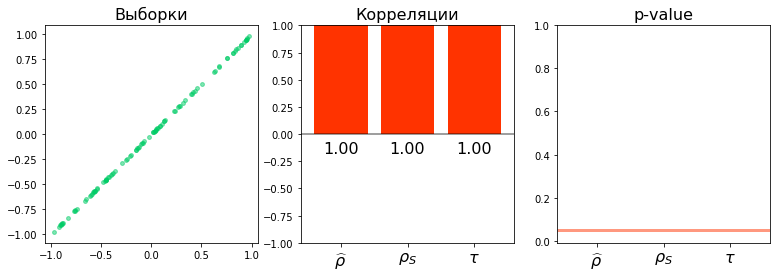

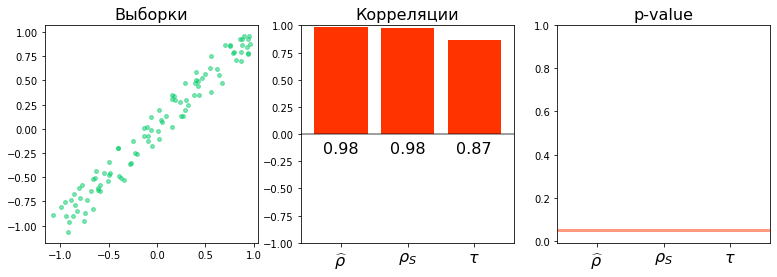

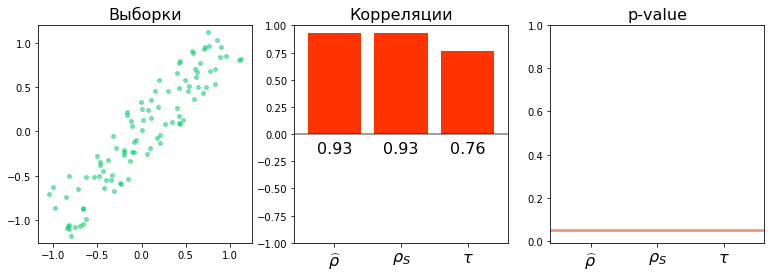

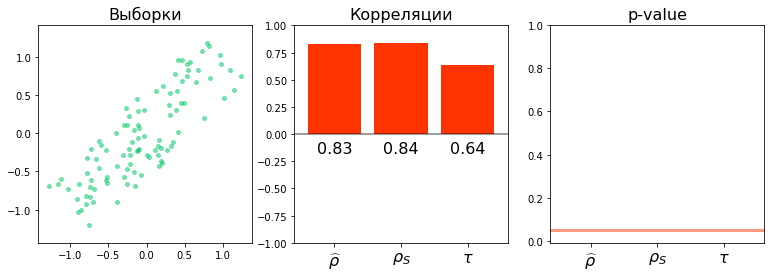

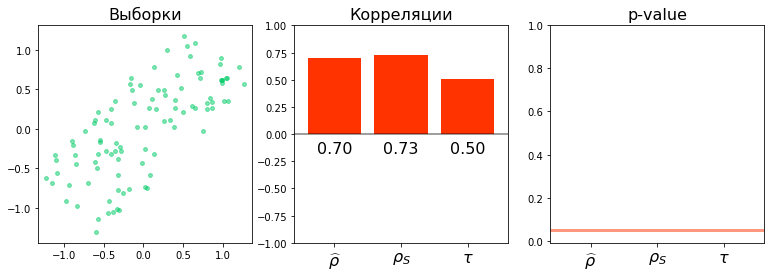

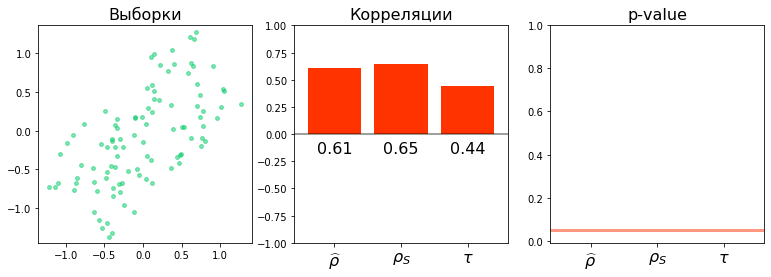

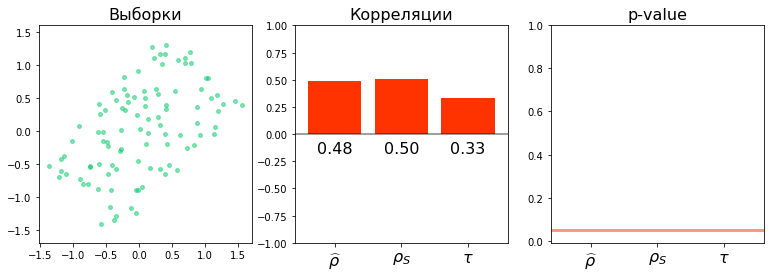

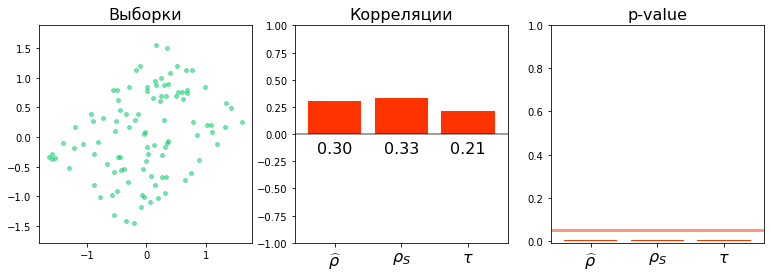

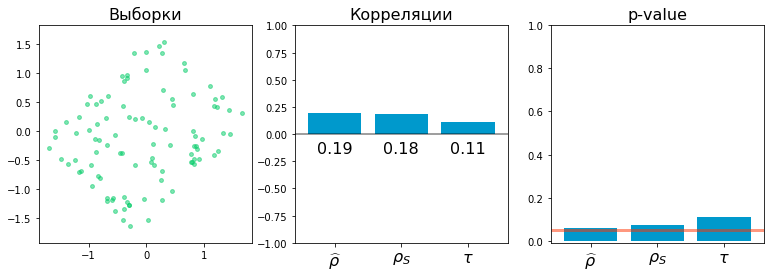

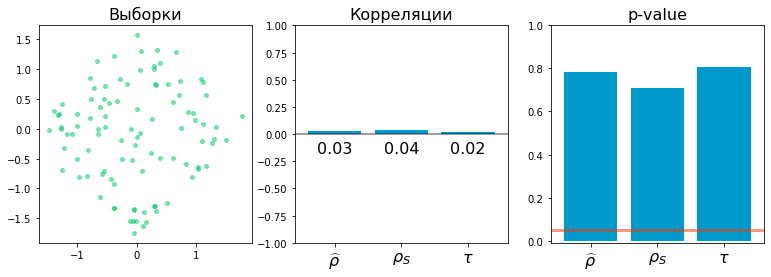

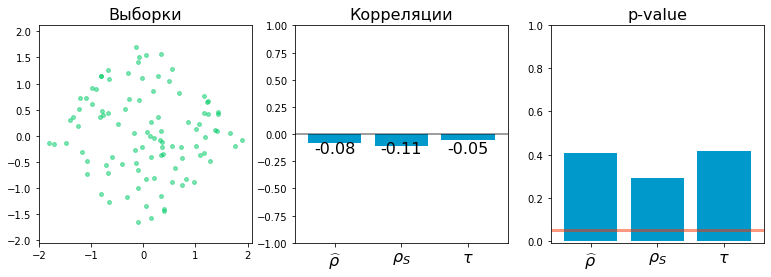

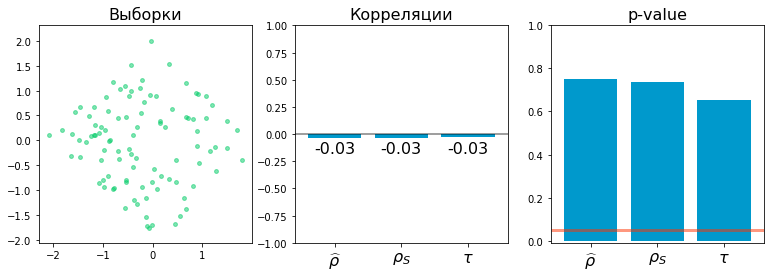

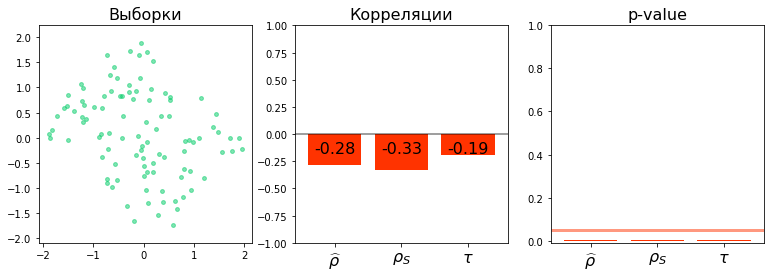

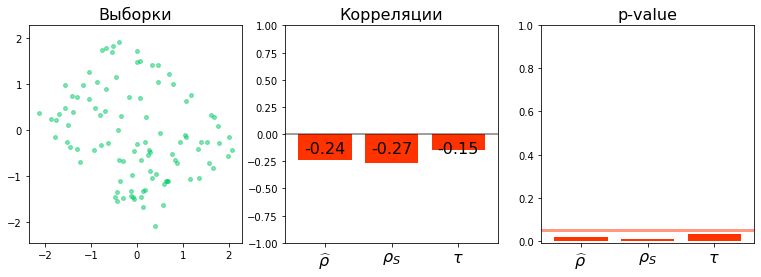

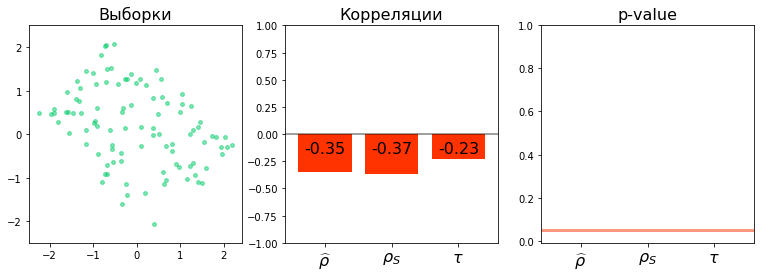

In [10]:
for i in range(15):
    x = sps.uniform(loc=-1, scale=2).rvs(size=100)
    y = sps.uniform(loc=-0.1*i, scale=0.2*i).rvs(size=100)
    draw_graphics(x + y, x - y)

Выборки расположены вдоль поворачивающейся прямой. Если одна из выборок принимает только одно значение, то коэффициент корреляции неопределен.

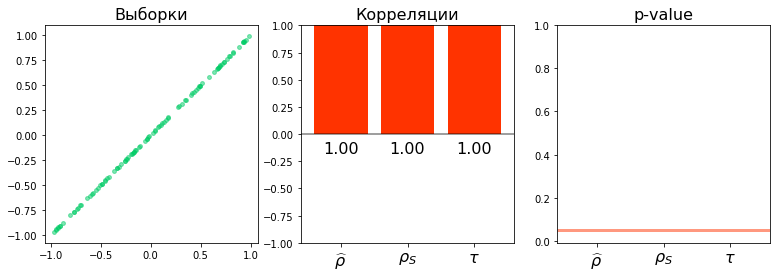

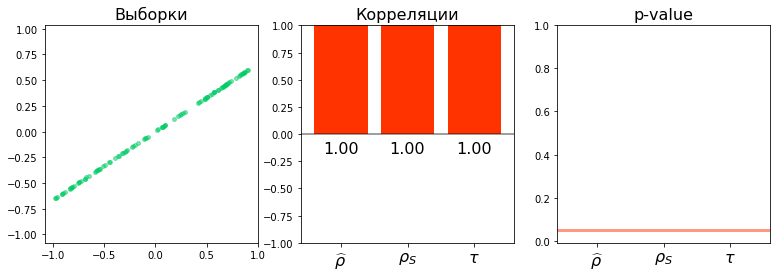

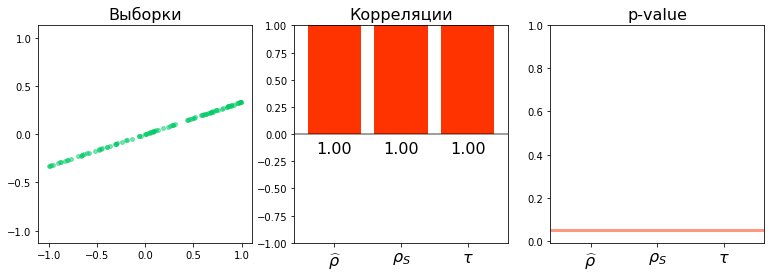

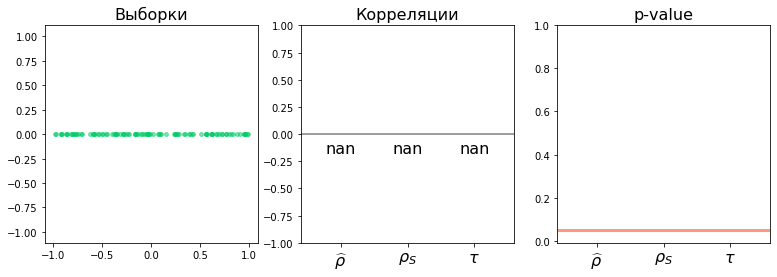

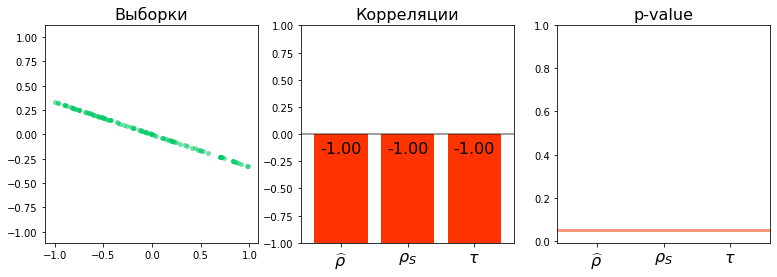

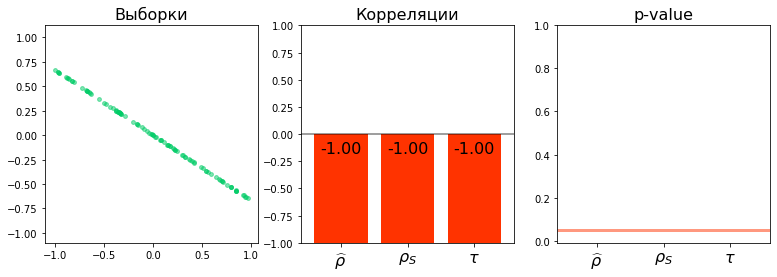

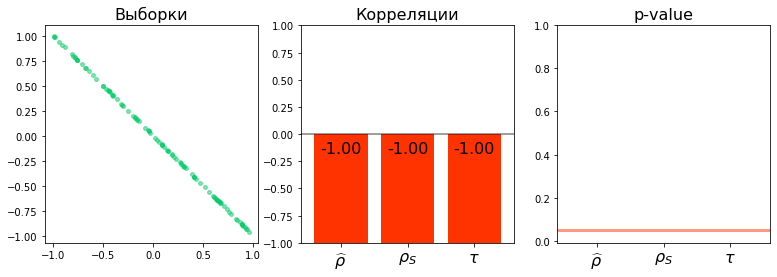

In [11]:
for i in range(7):
    x = sps.uniform(loc=-1, scale=2).rvs(size=100)
    draw_graphics(x, x * (1 - i/3))

Выборка размера 100 из двумерного нормального распределения.

Истинная корреляция: 0.0


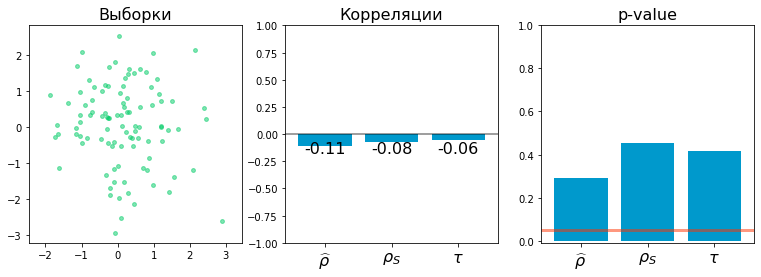

Истинная корреляция: 0.1


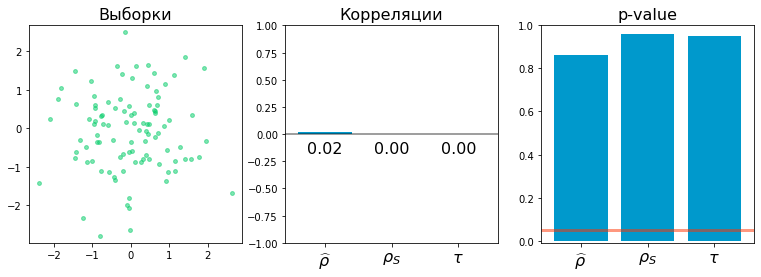

Истинная корреляция: 0.2


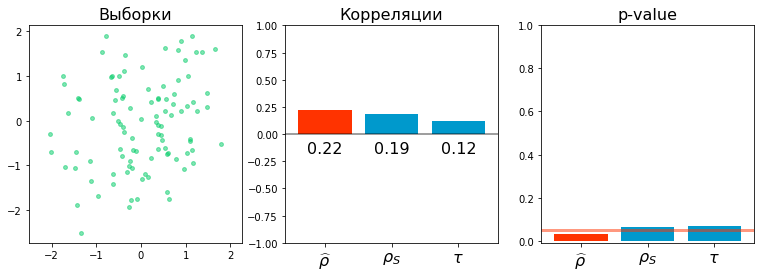

Истинная корреляция: 0.3


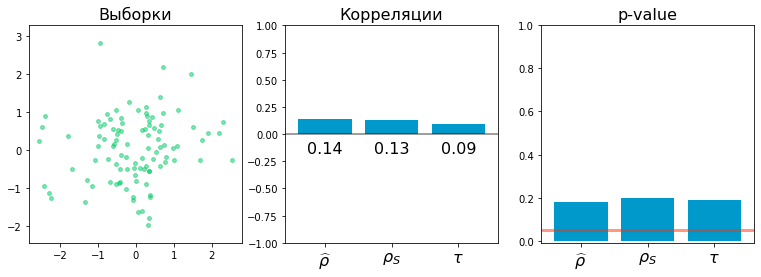

Истинная корреляция: 0.4


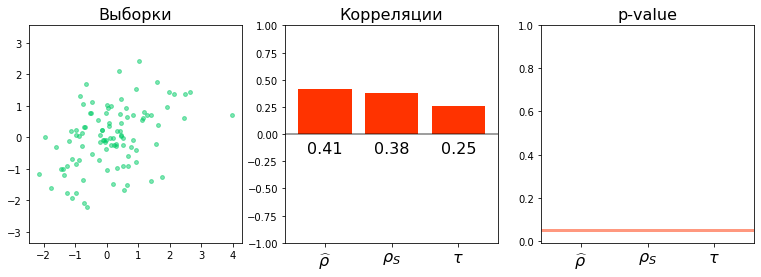

Истинная корреляция: 0.5


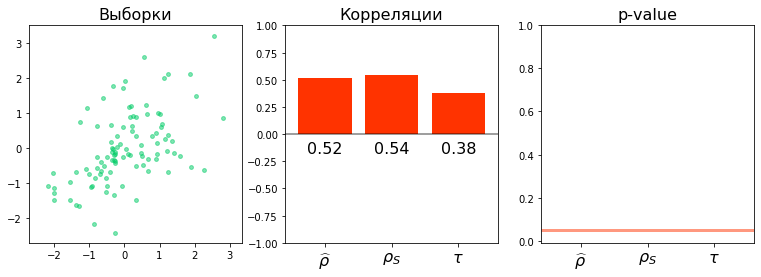

Истинная корреляция: 0.6


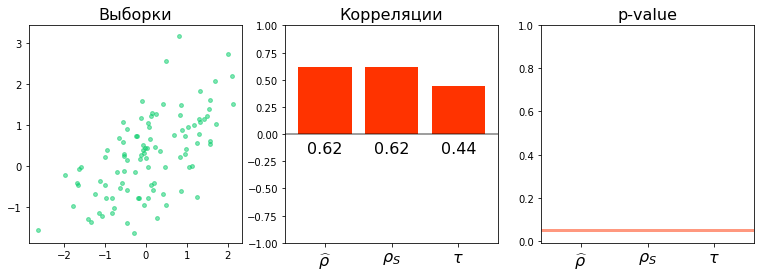

Истинная корреляция: 0.7


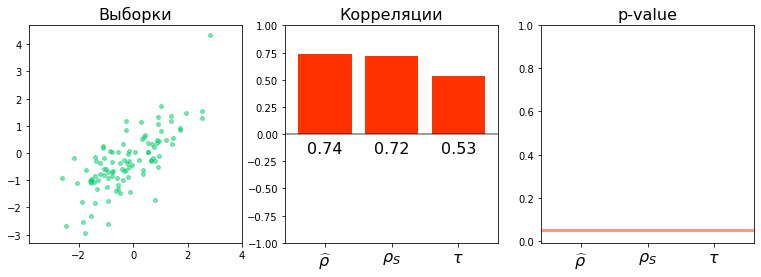

Истинная корреляция: 0.8


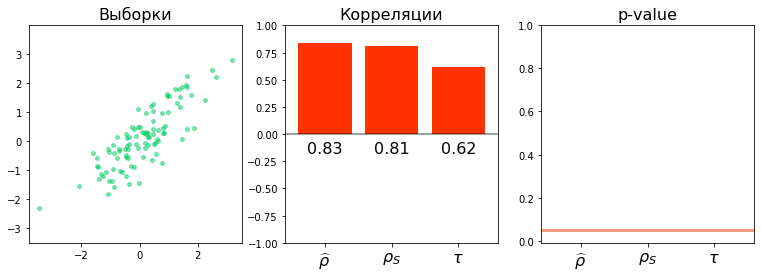

Истинная корреляция: 0.9


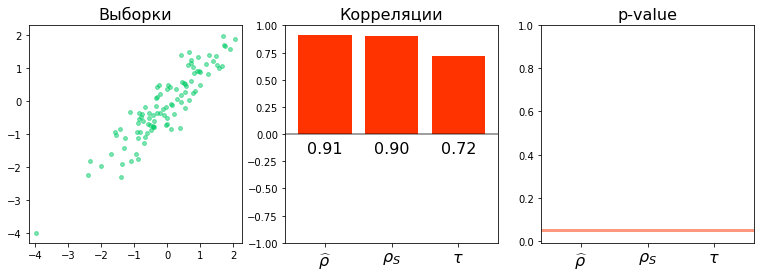

Истинная корреляция: 1.0


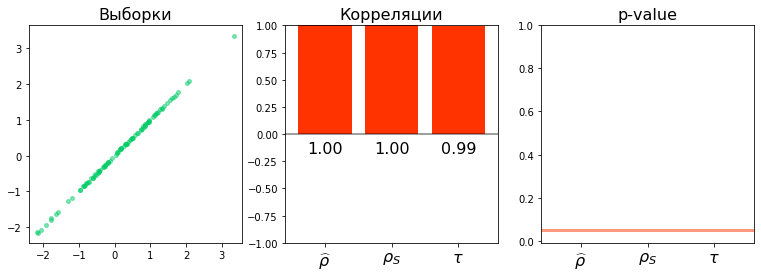

In [12]:
for i in range(11):
    cov = 0.1 * i if i < 10 else 0.9999
    print('Истинная корреляция: %.1f' % cov)
    x1, x2 = sps.multivariate_normal(cov=[[1, cov], [cov, 1]]).rvs(size=100).T
    draw_graphics(x1, x2)

Выборка размера 500 из двумерного нормального распределения.

Истинная корреляция: 0.0


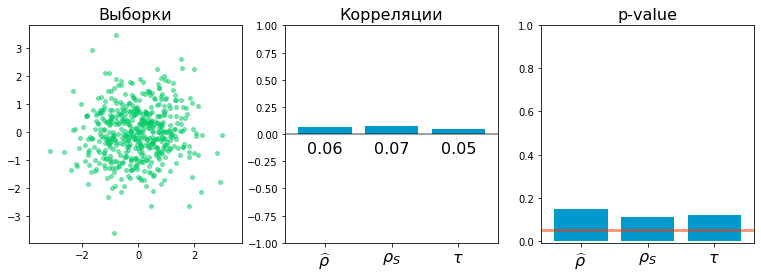

Истинная корреляция: 0.1


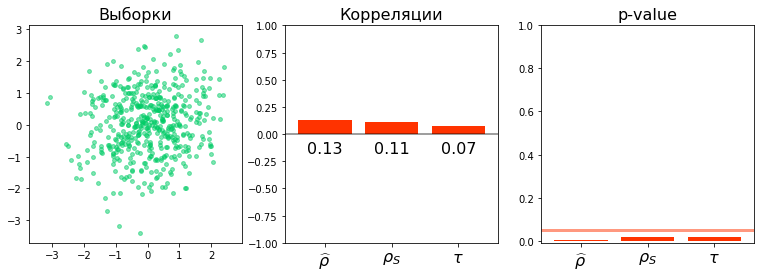

Истинная корреляция: 0.2


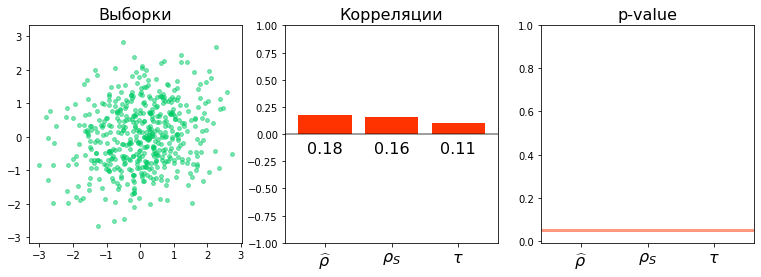

Истинная корреляция: 0.3


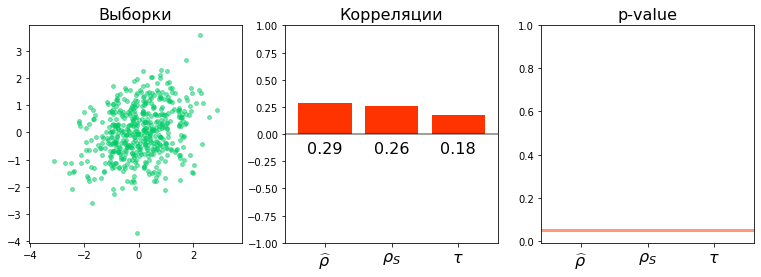

Истинная корреляция: 0.4


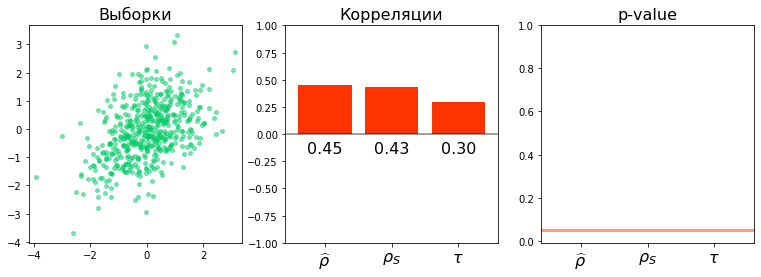

Истинная корреляция: 0.5


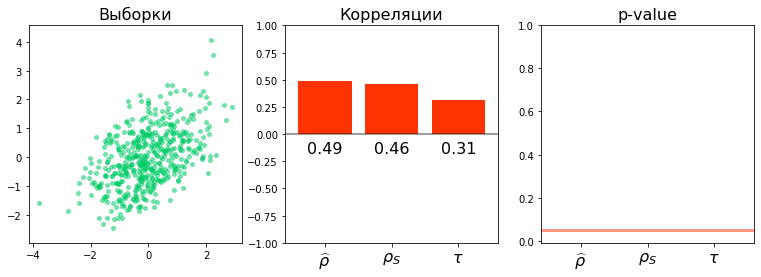

Истинная корреляция: 0.6


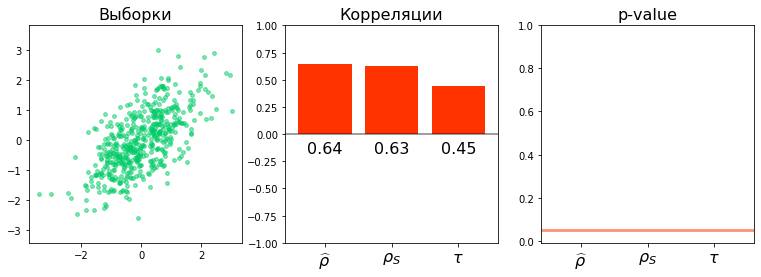

Истинная корреляция: 0.7


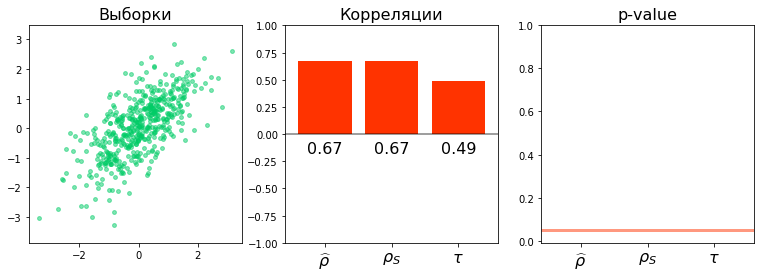

Истинная корреляция: 0.8


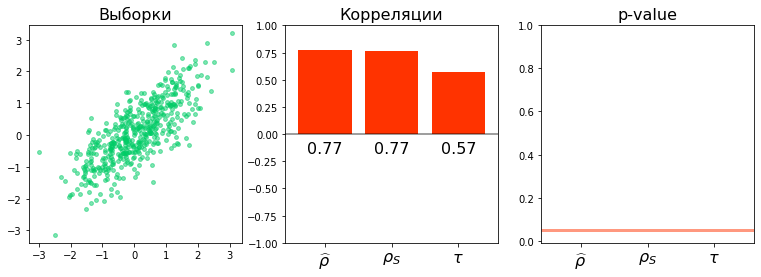

Истинная корреляция: 0.9


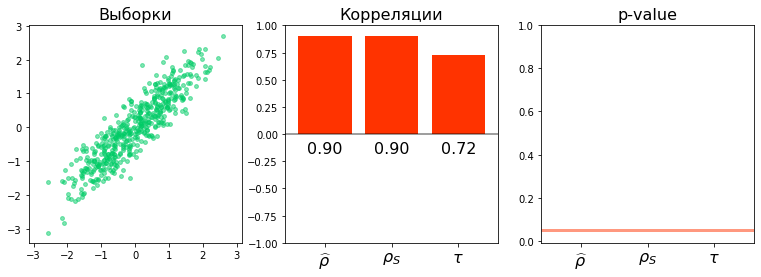

Истинная корреляция: 1.0


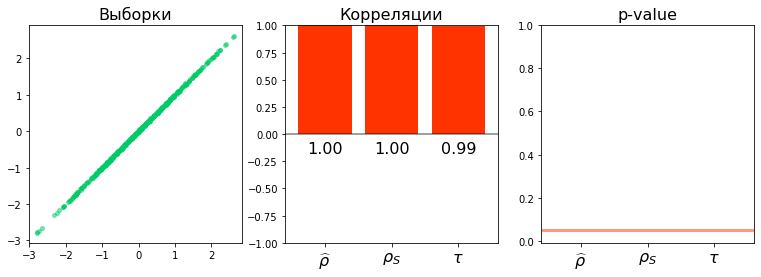

In [13]:
for i in range(11):
    cov = 0.1 * i if i < 10 else 0.9999
    print('Истинная корреляция: %.1f' % cov)
    x1, x2 = sps.multivariate_normal(cov=[[1, cov], [cov, 1]]).rvs(size=500).T
    draw_graphics(x1, x2)

Выборка размера 20 из двумерного нормального распределения. При малых значениях корреляции гипотеза о независимости не отвергается в отличии от выборки большего размера.

Истинная корреляция: 0.0


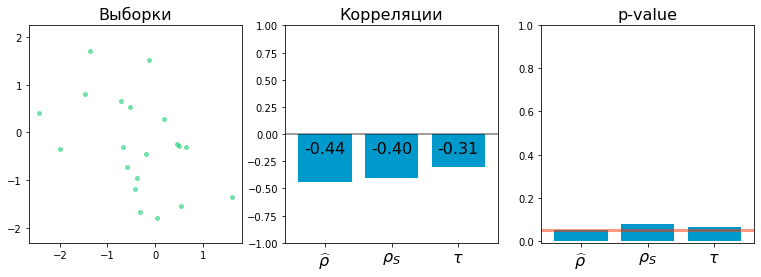

Истинная корреляция: 0.1


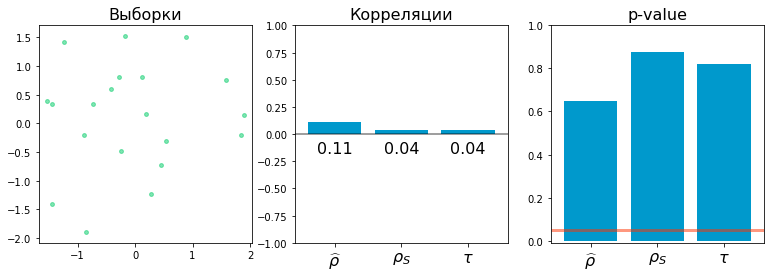

Истинная корреляция: 0.2


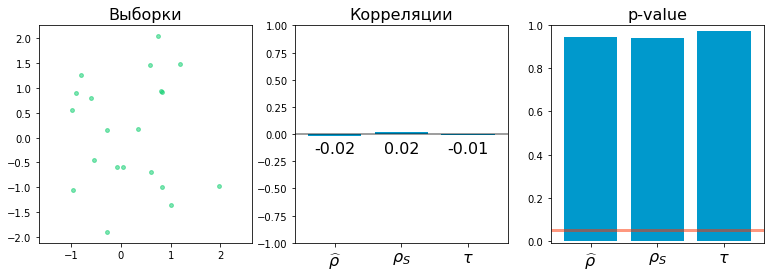

Истинная корреляция: 0.3


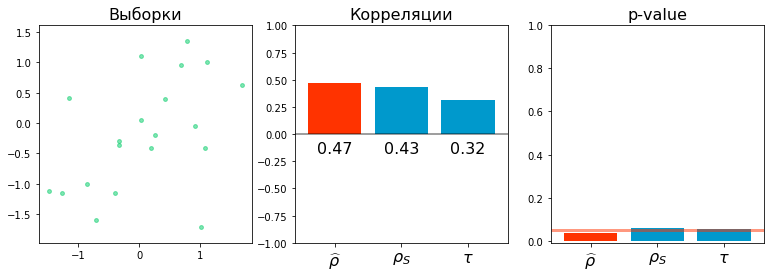

Истинная корреляция: 0.4


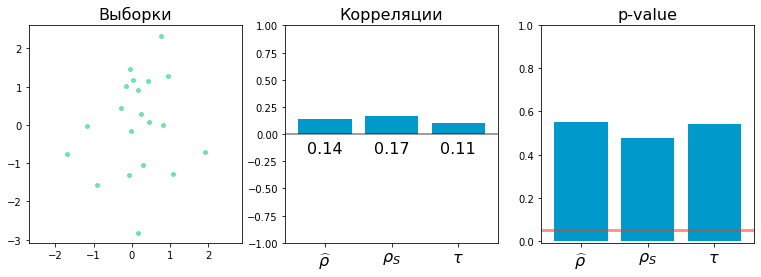

Истинная корреляция: 0.5


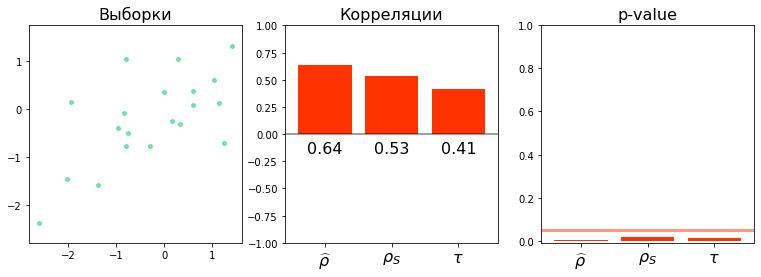

Истинная корреляция: 0.6


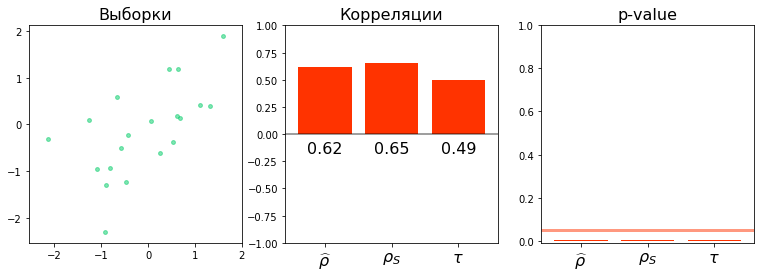

Истинная корреляция: 0.7


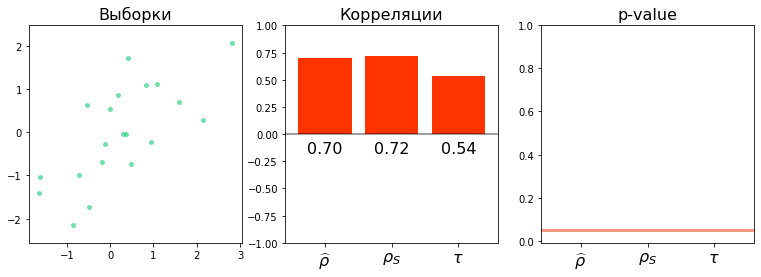

Истинная корреляция: 0.8


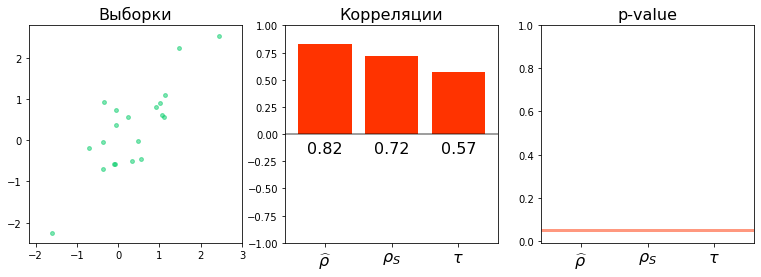

Истинная корреляция: 0.9


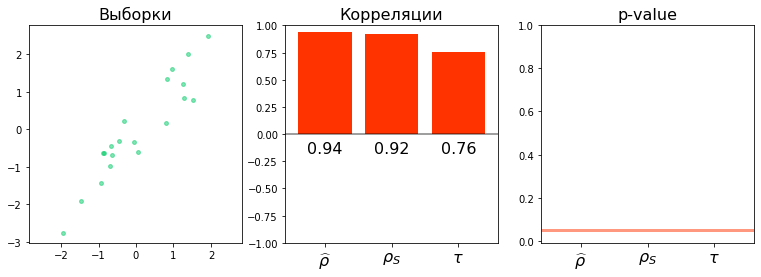

Истинная корреляция: 1.0


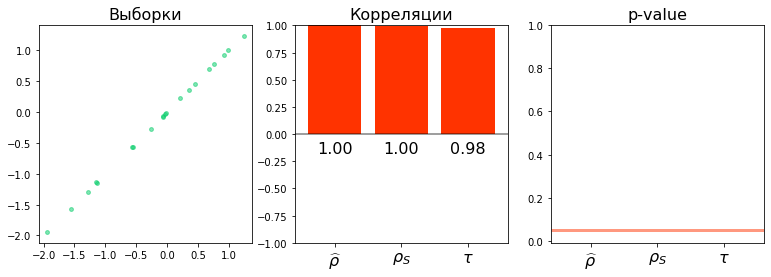

In [14]:
for i in range(11):
    cov = 0.1 * i if i < 10 else 0.9999
    print('Истинная корреляция: %.1f' % cov)
    x1, x2 = sps.multivariate_normal(cov=[[1, cov], [cov, 1]]).rvs(size=20).T
    draw_graphics(x1, x2)

Выборки "X". Очевидно, они зависимы, но коэффициенты корреляции близки к нулю.

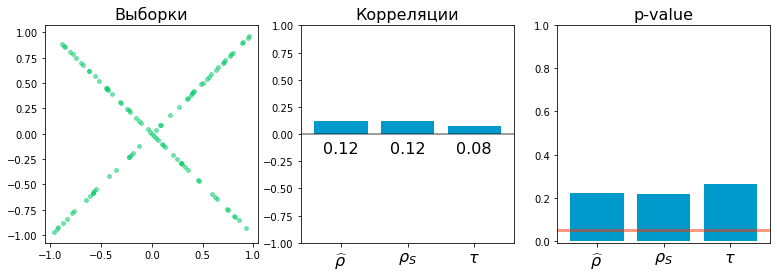

In [15]:
x1 = sps.uniform(loc=-1, scale=2).rvs(size=100)
x2 = x1 * (1 - 2 * sps.bernoulli(0.5).rvs(size=100))
draw_graphics(x1, x2)

При круговой зависимости выполняется аналогичное свойство.

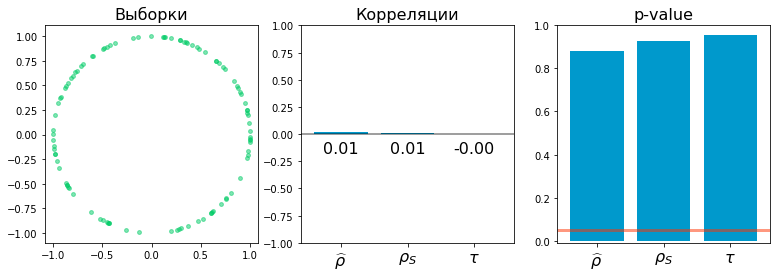

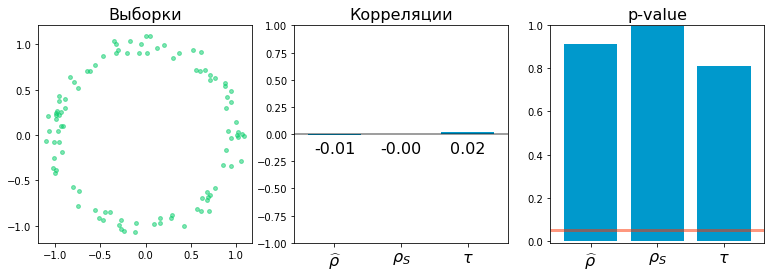

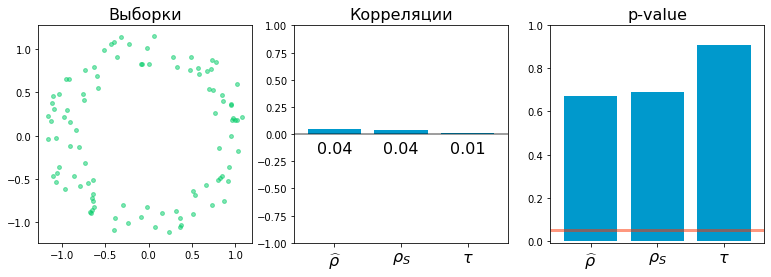

In [16]:
for i in range(3):
    phi = sps.uniform(loc=-1, scale=2).rvs(size=100)
    r = 1 + sps.uniform(loc=-0.1*i, scale=0.2*i).rvs(size=100)
    draw_graphics(r * np.cos(np.pi * phi), r * np.sin(np.pi * phi))

Несколько других примеров

In [17]:
from sklearn.datasets import make_circles, make_blobs

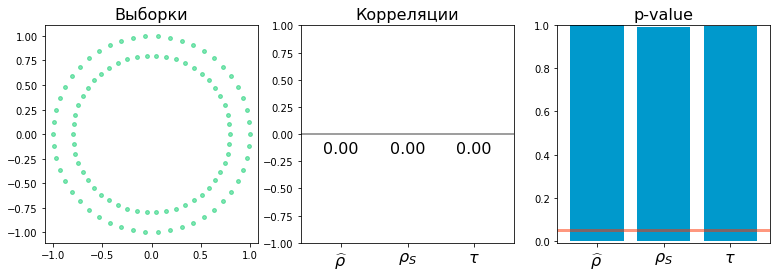

In [18]:
x, y = make_circles(n_samples=100)[0].T
draw_graphics(x, y)

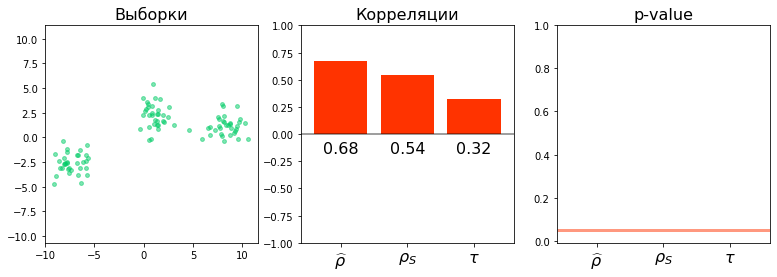

In [19]:
x, y = make_blobs(n_samples=100)[0].T
draw_graphics(x, y)

Пусть выборки линейно зависимы, но при этом случился один выброс (в левом верхнем углу). Коэффициент корреляции Пирсона близок к нулю, несмотря на очевидную зависимость данных. Остальные коэффициенты корреляции не сильно влияют на выброс.

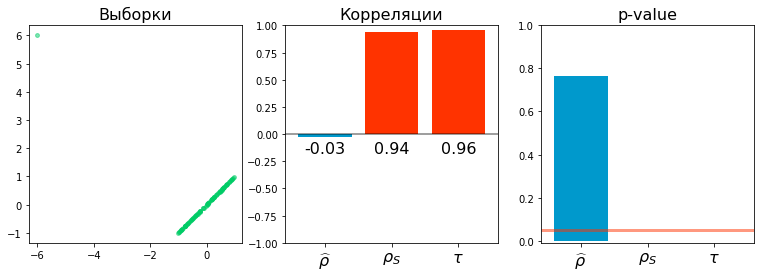

In [20]:
x1 = sps.uniform(loc=-1, scale=2).rvs(size=100)
x2 = np.array(x1)
x1[-1] = -6
x2[-1] = 6
draw_graphics(x1, x2)

Если выбор "слишком большой", то коэффициент корреляции Пирсона может быть близок к -1, что означает отрицательную линейную зависимость, несмотря на то, что на самом деле она положительна. Другие два коэффициента корреляции практически не меняются.

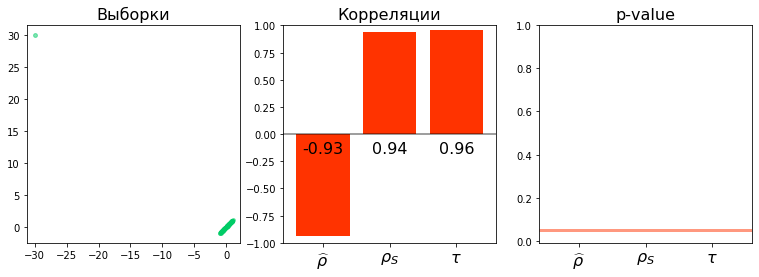

In [21]:
x1 = sps.uniform(loc=-1, scale=2).rvs(size=100)
x2 = np.array(x1)
x1[-1] = -30
x2[-1] = 30
draw_graphics(x1, x2)

<a href="https://upload.wikimedia.org/wikipedia/commons/0/02/Correlation_examples.png">Еще несколько примеров с Википедии</a>

<a href="http://guessthecorrelation.com">**Игра - отгадайте значение коэффициента корреляции Пирсона по выборке.**</a>

---------

Прикладная статистика и анализ данных, 2019

Никита Волков

https://mipt-stats.gitlab.io/